In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [5]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [6]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,1.000000,0.833333,1.000000,0.833333,1.000000,0.666667
1,0.833333,0.857143,1.000000,0.666667,1.000000,0.833333
2,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
3,0.857143,0.833333,0.666667,0.400000,0.500000,0.833333
4,1.000000,1.000000,1.000000,0.833333,0.833333,0.833333
...,...,...,...,...,...,...
45,0.833333,1.000000,1.000000,0.857143,0.833333,0.500000
46,1.000000,0.500000,0.833333,1.000000,1.000000,0.666667
47,0.857143,1.000000,1.000000,1.000000,0.571429,0.571429
48,0.500000,0.833333,0.833333,0.833333,1.000000,0.833333


In [7]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,2.348707,1.373170,1.212281,1.281289,7.784495,1.209014
1,2.050383,1.452404,3.862194,1.199771,4.102824,1.179632
2,7.997737,1.600233,1.235034,1.875205,6.986158,1.166497
3,1.840201,1.323270,1.337052,1.107028,61.357673,1.185367
4,1.862019,1.240667,1.546385,3.235888,49.546860,1.181508
...,...,...,...,...,...,...
45,6.008177,1.759789,1.393205,1.261633,130.130543,1.190857
46,1.843976,1.295608,1.937990,3.417093,14.194631,1.162892
47,2.229291,1.715705,7.626976,1.184176,2695.197056,1.251069
48,1.904775,1.484778,1.344584,2.244195,10.237066,1.165240


In [8]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,4.610741,4.608942,5.440818,5.075341,4.835576,4.835576
1,4.765469,5.271904,4.526459,5.364840,4.693826,4.693826
2,4.839360,4.994966,5.329482,5.604864,4.915612,4.915612
3,5.760413,5.577626,4.989056,6.267465,4.977605,4.977605
4,3.968913,4.619847,4.641513,4.839659,4.230624,4.230624
...,...,...,...,...,...,...
45,5.092213,5.111429,6.020897,6.759449,5.493361,5.493361
46,5.128232,5.595102,5.571311,6.014142,5.222813,5.222813
47,4.301747,4.861761,5.696402,5.750061,4.701572,4.701572
48,5.252109,4.909832,5.579976,5.286567,4.512536,4.512536


In [9]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0         0.899083
2.5         0.873581
5.0         0.880571
10.0        0.890871
Tree val    0.915590
Naive       0.657505
dtype: float64
Length :
 1.0          2.451656
2.5          2.005930
5.0          2.785887
10.0         2.580239
Tree val    32.848878
Naive        1.175485
dtype: float64
MSE :
 1.0         4.771887
2.5         4.922290
5.0         5.183711
10.0        5.393316
Tree val    4.766580
Naive       4.766580
dtype: float64


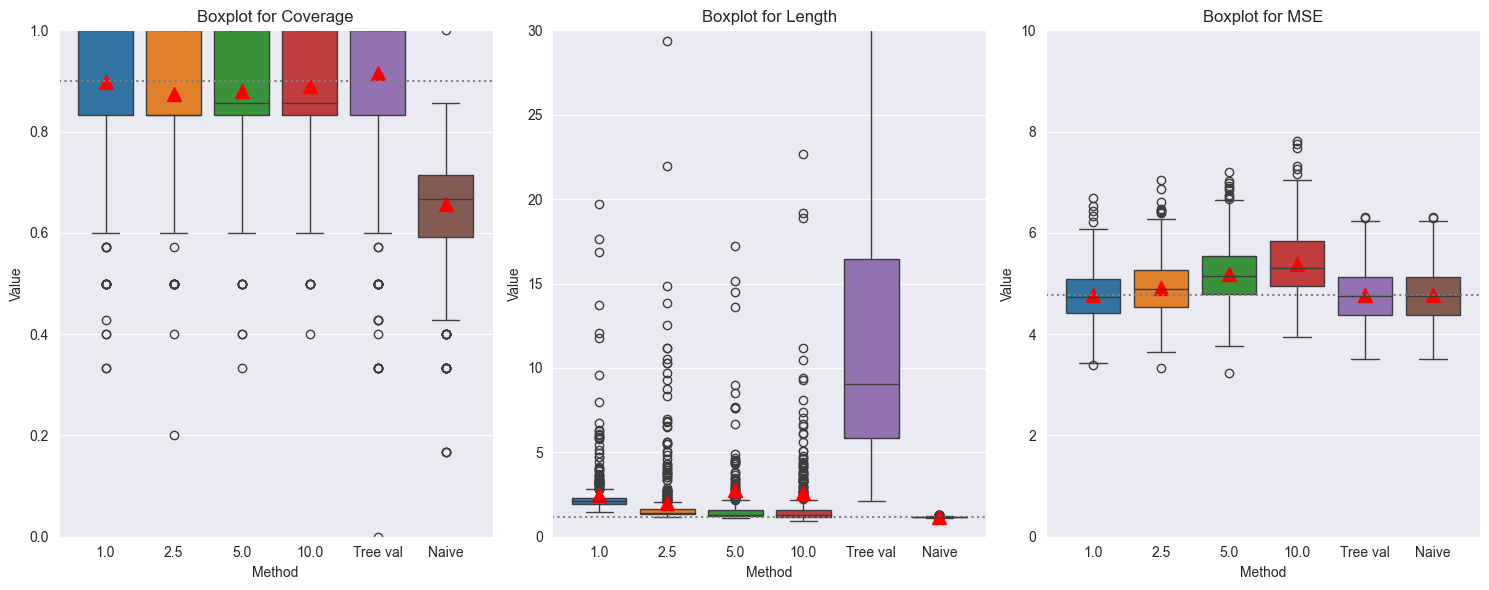

In [10]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"])

In [11]:
# TODO: Case 1 with 1, 5, 10